In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d vuppalaadithyasairam/bone-fracture-detection-using-xrays

Dataset URL: https://www.kaggle.com/datasets/vuppalaadithyasairam/bone-fracture-detection-using-xrays
License(s): unknown
 97% 168M/172M [00:05<00:00, 41.1MB/s]
100% 172M/172M [00:05<00:00, 35.2MB/s]


In [4]:
!unzip -q bone-fracture-detection-using-xrays.zip

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
train_dir = 'archive (6)/train'
validation_dir = 'archive (6)/val'

In [7]:
BATCH_SIZE = 32
IMG_SIZE = (360, 360)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)


validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)


Found 8863 files belonging to 2 classes.
Found 600 files belonging to 2 classes.


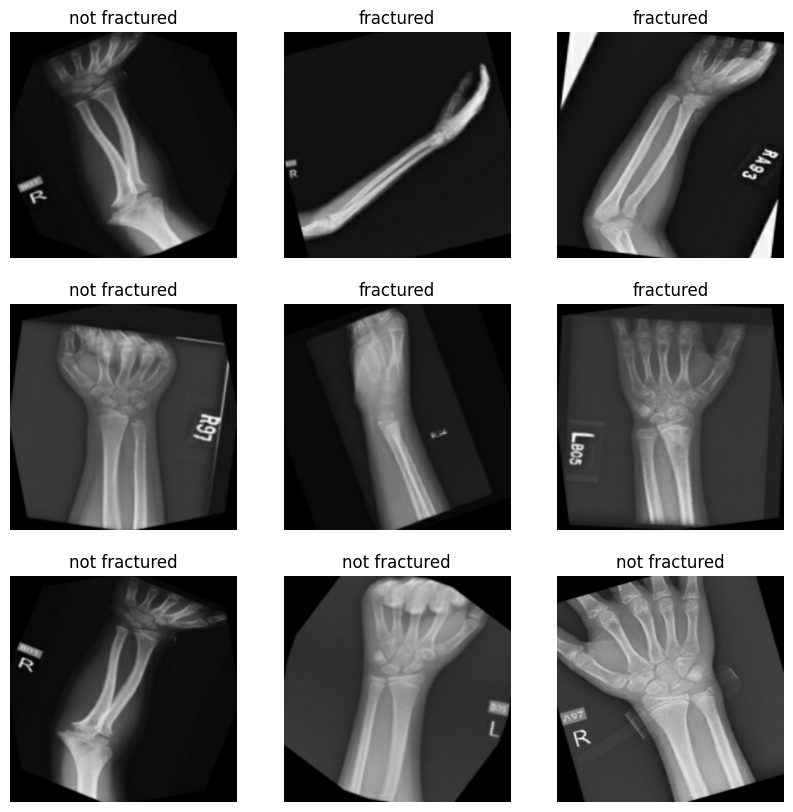

In [8]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [10]:
inception = tf.keras.applications.inception_v3.InceptionV3 (input_shape = (360,360,3),
                                                            include_top = False,
                                                            weights = 'imagenet')
inception.trainable = False
out = inception.get_layer('mixed8').output

base = tf.keras.Model(inputs=inception.input, outputs=out)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [13]:
# Data augmentation layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

In [16]:
model = tf.keras.models.Sequential([tf.keras.Input(shape=(360,360,3)),
                                    data_augmentation,
                                    base,
                                    tf.keras.layers.GlobalAvgPool2D(),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights = True,verbose = 1),
             tf.keras.callbacks.ModelCheckpoint(filepath='model.keras', monitor='val_accuracy', save_best_only=True)]

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [17]:
history = model.fit(train_dataset,epochs=20,validation_data=validation_dataset,callbacks=[callbacks])

Epoch 1/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 64s 208ms/step - accuracy: 0.5281 - loss: 1.9905 - val_accuracy: 0.5167 - val_loss: 0.9683
Epoch 2/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 79s 197ms/step - accuracy: 0.5845 - loss: 0.8641 - val_accuracy: 0.5067 - val_loss: 0.9208
Epoch 3/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 81s 192ms/step - accuracy: 0.6216 - loss: 0.7991 - val_accuracy: 0.5617 - val_loss: 0.8130
Epoch 4/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 82s 193ms/step - accuracy: 0.6557 - loss: 0.6825 - val_accuracy: 0.6633 - val_loss: 0.7959
Epoch 5/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 82s 193ms/step - accuracy: 0.6726 - loss: 0.6350 - val_accuracy: 0.6700 - val_loss: 0.8492
Epoch 6/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 83s 197ms/step - accuracy: 0.6776 - loss: 0.6554 - val_accuracy: 0.5833 - val_loss: 0.7666
Epoch 7/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 81s 193ms/step - accuracy: 0.6883 - loss: 0.6058 - val_accuracy: 0.7217 - val_loss: 0.6304
Epoch 8/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 83s 198ms/step - accuracy: 0.7056 - loss: 0

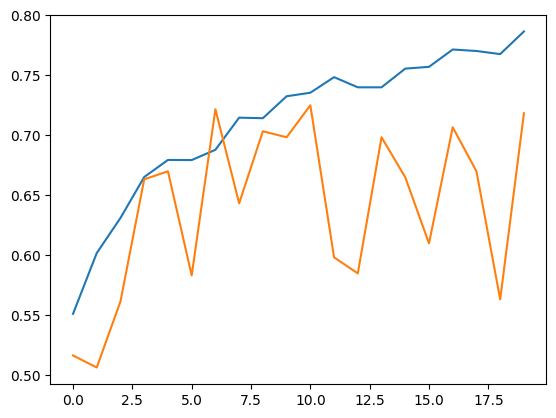

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(train_dataset,epochs=20,validation_data=validation_dataset,callbacks=[callbacks])

Epoch 1/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 61s 196ms/step - accuracy: 0.8054 - loss: 0.4164 - val_accuracy: 0.7083 - val_loss: 0.5920
Epoch 2/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 81s 192ms/step - accuracy: 0.8066 - loss: 0.4169 - val_accuracy: 0.7317 - val_loss: 0.5878
Epoch 3/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 81s 189ms/step - accuracy: 0.8195 - loss: 0.4011 - val_accuracy: 0.7217 - val_loss: 0.5926
Epoch 4/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 82s 191ms/step - accuracy: 0.8068 - loss: 0.4077 - val_accuracy: 0.7033 - val_loss: 0.6067
Epoch 5/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 54s 195ms/step - accuracy: 0.8186 - loss: 0.3957 - val_accuracy: 0.7050 - val_loss: 0.5950
Epoch 6/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 81s 190ms/step - accuracy: 0.8243 - loss: 0.3870 - val_accuracy: 0.7217 - val_loss: 0.5877
Epoch 7/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 82s 189ms/step - accuracy: 0.8162 - loss: 0.3997 - val_accuracy: 0.7067 - val_loss: 0.6070
Epoch 8/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 82s 191ms/step - accuracy: 0.8120 - loss: 0